In [3]:
 import numpy as np
 import matplotlib.pyplot as plt

In [4]:
 web_graph = {
    'A': ['B', 'C'],
    'B': ['C', 'D'],
    'C': ['A', 'D'],
    'D': ['C'],
    'E': ['A', 'D'],
 }

In [5]:
def pagerank(graph, d=0.85, tol=1e-6, max_iter=100):
    """
    Computes PageRank for each node in the graph.
    
    Parameters:
        graph (dict): A dictionary where each key is a node, and the value is a list of nodes that the key node links to.
        d (float): Damping factor, typically set to 0.85.
        tol (float): Tolerance level for convergence.
        max_iter (int): Maximum number of iterations.
        
    Returns:
        dict: PageRank values for each node in the graph.
    """
    # Number of nodes in the graph
    n = len(graph)
    
    # Initialize each page's rank with an equal distribution
    ranks = {page: 1 / n for page in graph}
    
    for _ in range(max_iter):
        new_ranks = {}
        
        # Calculate the rank for each page
        for page in graph:
            # Sum of ranks of pages linking to the current page
            rank_sum = sum(ranks[other_page] / len(graph[other_page]) for other_page in graph if page in graph[other_page])
            
            # Update the rank with the damping factor
            new_ranks[page] = (1 - d) / n + d * rank_sum
        
        # Check for convergence
        if max(abs(new_ranks[page] - ranks[page]) for page in graph) < tol:
            break
        
        # Update ranks for the next iteration
        ranks = new_ranks
    
    return ranks




In [6]:
pagerank_scores = pagerank(web_graph)

In [7]:
sorted_pagerank = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

In [8]:
print("PageRank Scores:")
for page, score in sorted_pagerank:
    print(f"Page {page}: {score:.4f}")

PageRank Scores:
Page C: 0.3871
Page D: 0.2575
Page A: 0.2073
Page B: 0.1181
Page E: 0.0300


In [9]:
import matplotlib.pyplot as plt

def visualize_graph(graph, ranks):
    """
    Visualizes a directed graph with nodes sized according to PageRank scores.
    
    Parameters:
        graph (dict): A dictionary representing the graph, with nodes as keys and lists of linked nodes as values.
        ranks (dict): A dictionary with PageRank scores for each node.
    """
    # Define positions for each node (page) in the graph
    positions = {
        'A': (1, 2),
        'B': (2, 3),
        'C': (3, 2),
        'D': (2, 1),
        'E': (0, 1.5),
    }
    
    # Create a figure and axis for plotting
    fig, ax = plt.subplots()
    
    # Plot nodes (web pages) with sizes based on PageRank scores
    for page, (x, y) in positions.items():
        ax.scatter(x, y, s=ranks.get(page, 0) * 2000, color='skyblue', edgecolors='black', zorder=2,)
        ax.text(x, y, page, fontsize=10, ha='center', va='center', zorder=3)
    
    # Plot edges (links between pages)
    for page, links in graph.items():
        for link in links:
            start_pos = positions[page]
            end_pos = positions[link]
            ax.annotate("",
                        xy=end_pos, xytext=start_pos,
                        arrowprops=dict(arrowstyle="->", color='gray', lw=1.5),
                        zorder=1)
    
    # Set limits and remove axis for a cleaner look
    ax.set_xlim(-1, 4)
    ax.set_ylim(0, 4)
    ax.axis('off')
    
    # Show the plot
    plt.show()


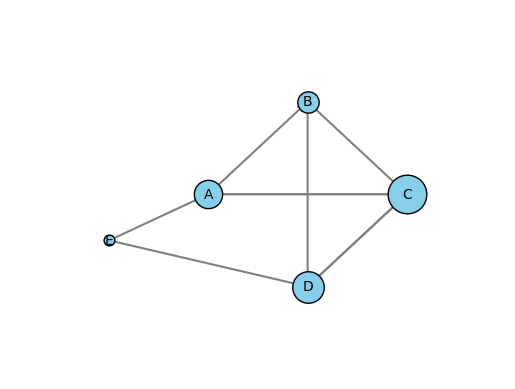

In [10]:
visualize_graph(web_graph, pagerank_scores)